In [219]:
import math
from draw_graph import *

In [244]:



class Value:
    def __init__(self, val, _parents=(), _op='', _label='value'):
        
        self.val = val
        self._prev = set(_parents)
        self._op = _op
        self.grad = 0.0
        self._label = _label
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(val={self.val}, label={self._label})"

    def __add__(self, another_value):
        result = self.val + another_value.val
        out = Value(result, _parents=(self, another_value), _op='+')
        
        #Define function for backprop for sum
        def _backward():
            
            self.grad += out.grad
            another_value.grad += out.grad
        
        self._backward = _backward
        
        
        return out

    def __mul__(self, another_value):

        result = self.val * another_value.val
        out = Value(result, _parents=(self, another_value), _op='*')
        
        def _backward():
            self.grad += another_value.val * out.grad
            another_value.grad += self.val * out.grad
            
        self._backward = _backward
        

        return out
    
    def tanh(self):
        val = (math.exp(2 * self.val) - 1) / (math.exp(2 * self.val) + 1)
        
        out = Value(val, _parents=(self, ), _op='tanh')
        
        def _backward():
            self.grad =  (1 - out.val ** 2) * out.grad
            
        self._backward = _backward
        
        return out
    
    def backward(self):
        
        self.grad = 1
        
        topo = []
        visited = set()

        #Topological sorting
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for parent in v._prev:
                    build_topo(parent)
                topo.append(v)
        
        build_topo(self)
        
        #go through node and call _backward()
        for node in reversed(topo):
            node._backward()


In [245]:
a = Value(0.4, _label="a")
b = Value(3, _label="b")
d = Value(0.3, _label="d")

c = a * b; c._label="c"
k = c * d; k._label="k"

inter = k.tanh(); inter._label = "inter"

final = inter.tanh() * Value(2)

**Visualizing computational graph**

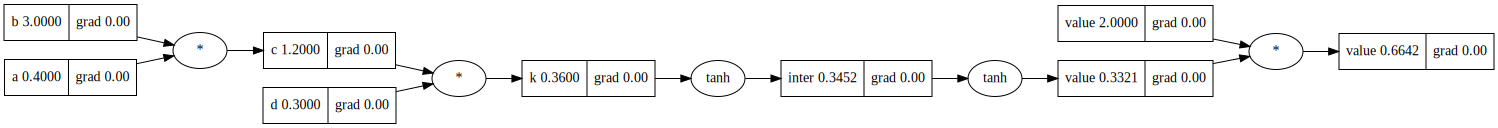

In [246]:

draw_dot(final)

In [228]:
final.backward()

        

In [247]:
a = Value(2); a._label="A"

c = a + a + a
fin = c.tanh()

In [248]:

fin.backward()

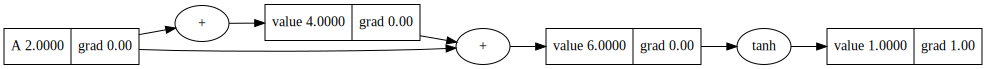

In [249]:
draw_dot(fin)

In [254]:
d.grad

0.0